# Multi-Class prediction Model for Cirrhosis Patients

In [2]:
'''The aim of the project is to build a multi-class prediction model for patients with Liver Cirrhosis
The Target variable is Status. C- means the patient is alive at N-days. CL means the patient is alive 
at N-days due to a liver transplant. D means the patient is deceased at N-Days'''

'The aim of the project is to build a multi-class prediction model for patients with Liver Cirrhosis\nThe Target variable is Status. C- means the patient is alive at N-days. CL means the patient is alive \nat N-days due to a liver transplant. D means the patient is deceased at N-Days'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing your data

In [4]:
data=pd.read_csv('train.csv')

In [5]:
data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [6]:
data.shape #Tells you how many features and samples are in your dataset

(7905, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [8]:
data.describe() #this gives you some statistical overview of your dataset

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [9]:
data['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [10]:
data['Status'].value_counts()  #We can see form this code that the data is not evenly distributed

C     4965
D     2665
CL     275
Name: Status, dtype: int64

In [13]:
data.groupby('Status').mean()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
Status,,,,,,,,,,,,,
C,3945.426989,2322.529305,17969.769587,1.362699,322.078751,3.624918,61.491641,1596.690715,102.832914,107.406647,276.215106,10.405076,2.804230
CL,4123.287273,1610.105455,16230.600000,2.903273,404.829091,3.547418,102.905455,1823.011636,127.439673,122.556364,277.414545,10.549091,3.170909
D,3946.570732,1528.849156,19345.741839,4.857486,398.027392,3.405715,123.694934,2226.068893,135.211276,129.375985,243.503940,11.055797,3.443527


<AxesSubplot:>

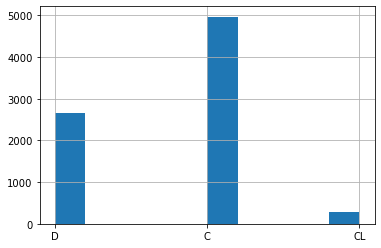

In [11]:
data['Status'].hist()

<AxesSubplot:>

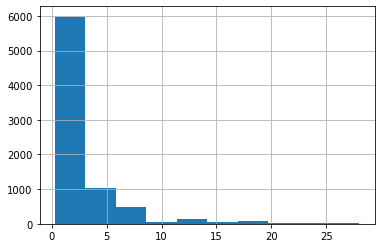

In [12]:
data['Bilirubin'].hist()

In [79]:
#We will try to change the categorical variables in our dataset to Numeric

In [80]:
data['Drug'].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [81]:
#First we import LabelEncoder from sklearn library

In [82]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

data['Sex']=encoder.fit_transform(data['Sex'])
data['Drug']=encoder.fit_transform(data['Drug'])
data['Ascites']=encoder.fit_transform(data['Ascites'])
data['Hepatomegaly']=encoder.fit_transform(data['Hepatomegaly'])
data['Spiders']=encoder.fit_transform(data['Spiders'])
data['Edema']=encoder.fit_transform(data['Edema'])

In [83]:
data.values[88]

array([88, 737, 1, 19693, 0, 0, 1, 1, 0, 3.6, 348.0, 3.8, 121.0, 979.0,
       120.9, 146.0, 142.0, 11.1, 4.0, 'CL'], dtype=object)

In [84]:
data.Status.unique()

array(['D', 'C', 'CL'], dtype=object)

In [108]:
data['Status']=encoder.fit_transform(data['Status']) # C = 0, CL = 1, D = 2

array([2, 0, 1])

In [23]:
X= data.drop(columns= 'Status', axis=1)
y=data['Status']

In [24]:
scaler= StandardScaler()

In [25]:
X= scaler.fit_transform(X)

In [26]:
X

array([[-1.73183171, -0.94242984, -1.01465513, ...,  1.47234122,
        -1.18904919, -0.0375219 ],
       [-1.7313935 ,  0.4970246 ,  0.98555654, ...,  1.09502608,
         0.47402401, -0.0375219 ],
       [-1.73095528,  1.27752879,  0.98555654, ..., -0.75724828,
         1.36952496,  1.11660504],
       ...,
       [ 1.73095528, -0.41508685, -1.01465513, ..., -0.74581448,
         2.64881203, -1.19164884],
       [ 1.7313935 ,  1.42010333, -1.01465513, ..., -0.50570484,
        -0.03769082,  1.11660504],
       [ 1.73183171, -0.04768324, -1.01465513, ...,  0.80918127,
        -0.42147694, -0.0375219 ]])

# Training the model

In [27]:
#We will make use of DecisionTreeClassifier

In [28]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #this means that 70% of our dataset is used to train the model

In [130]:
model= DecisionTreeClassifier()

In [135]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [134]:
model=RandomForestClassifier()

# Model Evaluation

In [136]:
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.8351602023608768


# Building a Prediction System for a single patient

In [137]:
input_data= []

input_data = [3164,2475,'D-penicillamine',13329,'F','N','N','N','N',3.4,450.0,3.26,32.0,1408.0,116.25,118.0,313.0,11.2,3.0]


for item in input_data:
    if input_data[2] == 'D-penicillamine':    #based on the label encoding we did in ln 65 and 66
        input_data[2]=0
    else:
        input_data[2]= 1

    if input_data[4]== 'M':
        input_data[4]=1
    else:
        input_data[4]=0
        
    if input_data[5]== 'N':
        input_data[5]= 0
    else:
        input_data[5]= 1
        
    if input_data[6]== 'N':
        input_data[6]= 0
    else:
        input_data[6]= 1
        
    if input_data[7]== 'N':
        input_data[7]= 0
    else:
        input_data[7]= 1
    
    if input_data[8]== 'N':
        input_data[8]= 0
    else:
        input_data[8]= 1
# changing the input data to numpy array

input_data_as_np= np.asarray(input_data)
#Reshape the array 

data_reshaped= input_data_as_np.reshape(1,-1)
std_data = scaler.transform(data_reshaped)

prediction= model.predict(std_data)
print(prediction)

if (prediction[0]== 0):          #remember that C = 0, CL = 1, D = 2
    print(f'The Patient was alive at day {input_data[1]}')
elif (prediction[0]==1):
    print(f'The Patient was alive at day {input_data[1]} due to a liver transplant')
else:
    print(f'The Patient was deceased at day {input_data[1]}')

[1]
The Patient was alive at day 2475 due to a liver transplant


C:\Users\RICHARD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Building A prediction System for a Dataset

In [33]:
dataset=pd.read_csv('test.csv')

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [35]:
dataset

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [36]:
dataset['Ascites']=encoder.fit_transform(dataset['Ascites'])
dataset['Hepatomegaly']=encoder.fit_transform(dataset['Hepatomegaly'])
dataset['Spiders']=encoder.fit_transform(dataset['Spiders'])
dataset['Edema']=encoder.fit_transform(dataset['Edema'])
dataset['Sex']=encoder.fit_transform(dataset['Sex'])
dataset['Drug']=encoder.fit_transform(dataset['Drug'])

In [138]:
dataset_as_np= np.asarray(dataset)

#Standardize the dataset

predScale = scaler.transform(dataset_as_np)

prediction1= model.predict(predScale)
print(prediction1)

C:\Users\RICHARD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0 0 2 ... 0 0 2]


In [139]:
prediction1= pd.DataFrame(prediction1, columns=['Status'])

In [140]:
prediction1

,Status
0,0
1,0
2,2
3,0
4,0
...,...
5266,0
5267,0
5268,0
5269,0


In [141]:
new_dataset= dataset.join(prediction1)

In [142]:
new_dataset['Status'].unique()

array([0, 2, 1])